## SEP 740 Project Report 1

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import time

In [ ]:
url = 'https://raw.githubusercontent.com/dashascience/-MBTI-Myers-Briggs-Personality-Type-Dataset/master/mbti_1.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
df.describe(include='all')

,type,posts
count,8675,8675
unique,16,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
freq,1832,1


In [ ]:
# checking the types of varibles in the dataset(int,float,object) and also looking at null values
dtypes=pd.DataFrame(df.dtypes,columns=["Data Type"])
dtypes["Unique Values"]=df.nunique()
dtypes["Null Values"]=df.isnull().sum()
dtypes["% null Values"]=df.isnull().sum()/len(df)
dtypes.style.background_gradient(cmap='Set2',axis=0)

,Data Type,Unique Values,Null Values,% null Values
type,object,16,0,0.000000
posts,object,8675,0,0.000000


In [ ]:
I = 0; N = 0
T = 0; J = 0
type_list = []
for t in df.type:   
  if t[0] == 'I': I = 1
  elif t[0] == 'E': I = 0
  else: print('I-E not found') 
        
  if t[1] == 'N': N = 1
  elif t[1] == 'S': N = 0
  else: print('N-S not found')
        
  if t[2] == 'T': T = 1
  elif t[2] == 'F': T = 0
  else: print('T-F not found')
        
  if t[3] == 'J': J = 1
  elif t[3] == 'P': J = 0
  else: print('J-P not found')
  type_list.append([I,N,T,J])

type_df=pd.DataFrame(type_list, columns=('I/E', 'N/S', 'T/F','J/P'))


In [ ]:
type_df

,I/E,N/S,T/F,J/P
0,1,1,0,1
1,0,1,1,0
2,1,1,1,0
3,1,1,1,1
4,0,1,1,1
...,...,...,...,...
8670,1,0,0,0
8671,0,1,0,0
8672,1,1,1,0
8673,1,1,0,0


Introversion (I) /  Extroversion (E):	 1999  /  6676
Intuition (N) / Sensing (S):		 1197  /  7478
Thinking (T) / Feeling (F):		 4694  /  3981
Judging (J) / Perceiving (P):		 5241  /  3434




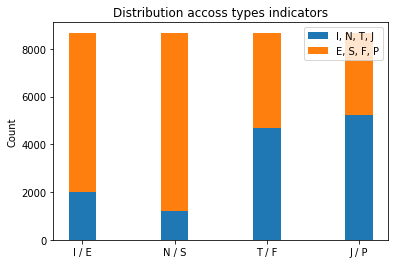

In [ ]:
print ("Introversion (I) /  Extroversion (E):\t", type_df['I/E'].value_counts()[0], " / ", type_df['I/E'].value_counts()[1])
print ("Intuition (N) / Sensing (S):\t\t", type_df['N/S'].value_counts()[0], " / ", type_df['N/S'].value_counts()[1])
print ("Thinking (T) / Feeling (F):\t\t", type_df['T/F'].value_counts()[0], " / ", type_df['T/F'].value_counts()[1])
print ("Judging (J) / Perceiving (P):\t\t", type_df['J/P'].value_counts()[0], " / ", type_df['J/P'].value_counts()[1])
print()
print()

#Plotting the distribution
N = 4 #4 broad classifications

#count when the chars are 0 - indicating extroversion 
bottom = (type_df['I/E'].value_counts()[0], type_df['N/S'].value_counts()[0], type_df['T/F'].value_counts()[0], type_df['J/P'].value_counts()[0])
#count when the chars are 1 - indicating intoversion
top = (type_df['I/E'].value_counts()[1], type_df['N/S'].value_counts()[1], type_df['T/F'].value_counts()[1], type_df['J/P'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.3           # or len(x) can also be used here

p1 = plt.bar(ind, bottom, width, label="I, N, T, J")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

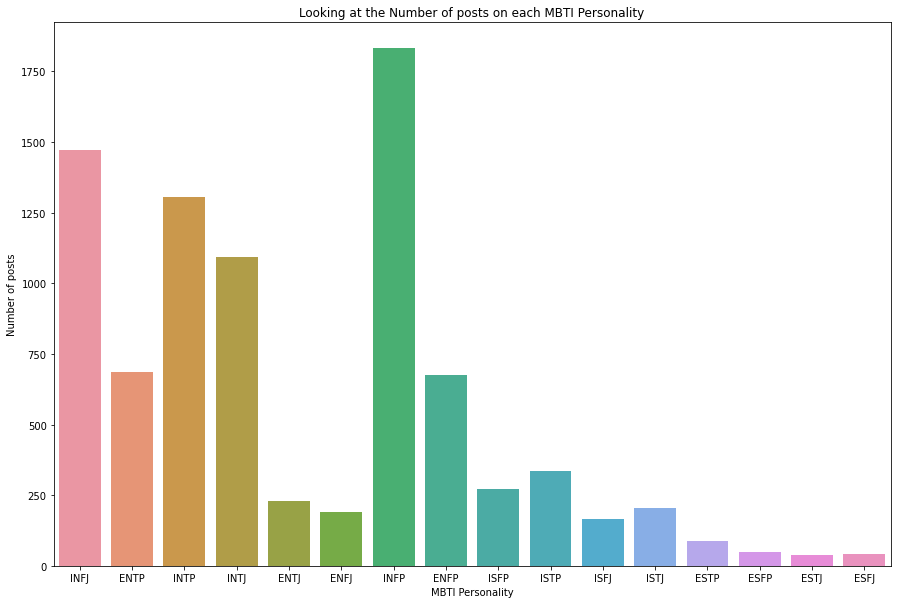

In [ ]:
plt.figure(figsize=(15,10))

sns.countplot(x=df['type'])
plt.ylabel('Number of posts')
plt.xlabel('MBTI Personality')
plt.title('Looking at the Number of posts on each MBTI Personality')


plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

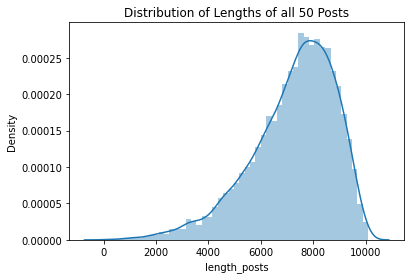

In [ ]:
#Density Plot - Word Count by Posts => gives an overall picture of kernel density estimation

df["length_posts"] = df["posts"].apply(len)
sns.distplot(df["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

In [ ]:
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
len(df.posts[0].split('|||'))

50

In [ ]:
for i in df.posts[0].split('|||'):
  print(i)

'http://www.youtube.com/watch?v=qsXHcwe3krw
http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg
enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks
What has been the most life-changing experience in your life?
http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.
May the PerC Experience immerse you.
The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206
Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...
84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...
Welcome and stuf

In [ ]:
import re
import nltk.corpus
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# Clean dataset
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# normalize, remove stop words and url links.
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 
clean_text1=[]
for i in df.posts[0].split('|||'):
  i=i.lower()
  i = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", i)
  i_tokens = word_tokenize(i)
  filtered_i = [w for w in i_tokens if not w in stop_words]
  clean_text1.append(filtered_i)
  print(filtered_i)


[]
[]
['enfp', 'intj', 'moments', 'sportscenter', 'top', 'ten', 'plays', 'pranks']
['lifechanging', 'experience', 'life']
['repeat', 'today']
['may', 'perc', 'experience', 'immerse']
['last', 'thing', 'infj', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'rest', 'peace']
['hello', 'enfj7', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'times', 'times', 'growth']
['84389', '84390']
['welcome', 'stuff']
['game', 'set', 'match']
['prozac', 'wellbrutin', 'least', 'thirty', 'minutes', 'moving', 'legs', 'dont', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edibles', 'healthier', 'alternative']
['basically', 'come', 'three', 'items', 'youve', 'determined', 'type', 'whichever', 'types', 'want', 'would', 'likely', 'use', 'given', 'types', 'cognitive', 'functions', 'whatnot', 'left']
['things', 'moderation', 'sims', 'indeed', 'video', 'game', '

In [ ]:
#lemmatization ensure that only words that mean similar things are consolidated into a single token
for j in clean_text1:
  for p in range(len(j)):
    j[p]=lemmatizer.lemmatize(j[p])
  print(j) 

[]
[]
['enfp', 'intj', 'moment', 'sportscenter', 'top', 'ten', 'play', 'prank']
['lifechanging', 'experience', 'life']
['repeat', 'today']
['may', 'perc', 'experience', 'immerse']
['last', 'thing', 'infj', 'friend', 'posted', 'facebook', 'committing', 'suicide', 'next', 'day', 'rest', 'peace']
['hello', 'enfj7', 'sorry', 'hear', 'distress', 'natural', 'relationship', 'perfection', 'time', 'every', 'moment', 'existence', 'try', 'figure', 'hard', 'time', 'time', 'growth']
['84389', '84390']
['welcome', 'stuff']
['game', 'set', 'match']
['prozac', 'wellbrutin', 'least', 'thirty', 'minute', 'moving', 'leg', 'dont', 'mean', 'moving', 'sitting', 'desk', 'chair', 'weed', 'moderation', 'maybe', 'try', 'edible', 'healthier', 'alternative']
['basically', 'come', 'three', 'item', 'youve', 'determined', 'type', 'whichever', 'type', 'want', 'would', 'likely', 'use', 'given', 'type', 'cognitive', 'function', 'whatnot', 'left']
['thing', 'moderation', 'sims', 'indeed', 'video', 'game', 'good', 'one',

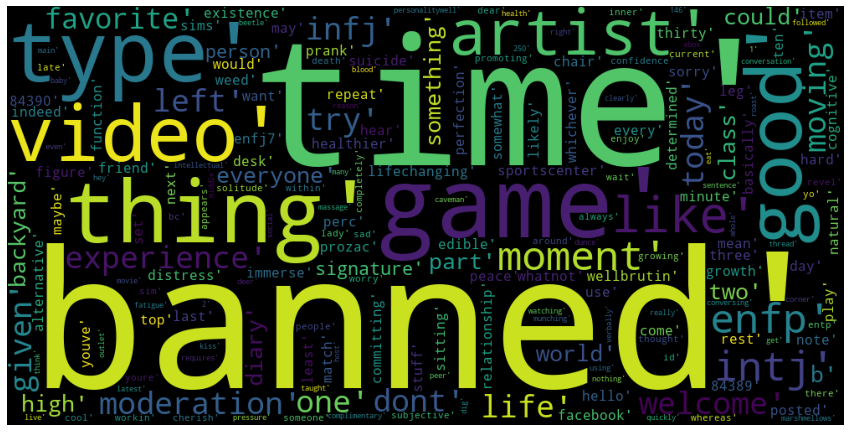

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#convert list to string and generate
unique_string=(' ').join(str(v) for v in clean_text1)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
# Clean methods for dataframe cleaning
def clean_data(str):
  clean_text1=[]
  for i in str.split('|||'):
    i=i.lower()
    i = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", i)
    i_tokens = word_tokenize(i)
    filtered_i = [w for w in i_tokens if not w in stop_words]
    clean_text1.append(filtered_i)
  return clean_text1

def lemmatized_data(strList):
  for j in strList:
    for p in range(len(j)):
      j[p]=lemmatizer.lemmatize(j[p])
  return strList

In [ ]:
# Take 1 min to combine
final_list=[]
for i in range(len(df.posts)):
  x=clean_data(df.posts[i])
  y=lemmatized_data(x)
  final_list.append(y)

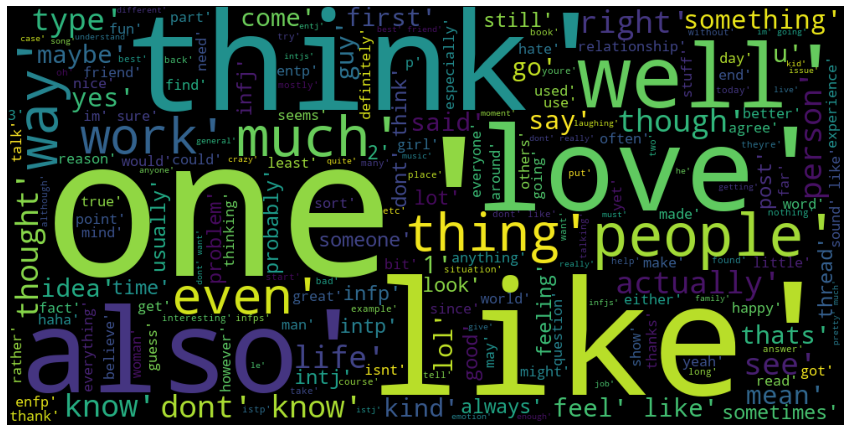

In [ ]:
#convert list to string and generate final word cloud for the cleaned posts.
unique_string2=(' ').join(str(v) for v in final_list)
wordcloud2 = WordCloud(width = 1000, height = 500).generate(unique_string2)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud2)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')

data_length=[]
lemmatizer=WordNetLemmatizer()
clean_text1=[]
for i in range(0,len(df.posts)):
  doc = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", df.posts[i])
  doc = doc.lower()
  doc = doc.split()
  doc = [lemmatizer.lemmatize(word) for word in doc if not word in set(stopwords)]
  doc = ' '.join(doc)
  clean_text1.append(doc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,type,posts,length_posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,4652
1,ENTP,'I'm finding the lack of me in these posts ver...,7053
2,INTP,'Good one _____ https://www.youtube.com/wat...,5265
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",6271
4,ENTJ,'You're fired.|||That's another silly misconce...,6111
...,...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...,5011
8671,ENFP,'So...if this thread already exists someplace ...,7902
8672,INTP,'So many questions when i do these things. I ...,5772
8673,INFP,'I am very conflicted right now when it comes ...,9479


In [ ]:
# Find the original posts column
n = df.columns[1]

# Drop that column
df.drop(n, axis = 1, inplace = True)

# Put cleaned posts in place
df[n] = clean_text1

In [ ]:
df

,type,length_posts,posts
0,INFJ,4652,intj moment sportscenter top ten play prankswh...
1,ENTP,7053,im finding lack post alarmingsex boring positi...
2,INTP,5265,good one course say know thats blessing cursed...
3,INTJ,6271,dear intp enjoyed conversation day esoteric ga...
4,ENTJ,6111,youre firedthats another silly misconception a...
...,...,...,...
8670,ISFP,5011,always think cat fi doms reason website become...
8671,ENFP,7902,soif thread already exists someplace else heck...
8672,INTP,5772,many question thing would take purple pill pic...
8673,INFP,9479,conflicted right come wanting child honestly m...


In [ ]:
df['clean_text']= clean_text1
df = df[['clean_text', 'type']]

types=df['type']
text=df['clean_text']
df.head()


,clean_text,type
0,intj moment sportscenter top ten play prankswh...,INFJ
1,im finding lack post alarmingsex boring positi...,ENTP
2,good one course say know thats blessing cursed...,INTP
3,dear intp enjoyed conversation day esoteric ga...,INTJ
4,youre firedthats another silly misconception a...,ENTJ


In [ ]:
%matplotlib inline
from nltk import tokenize

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras import initializers as initializers, regularizers, constraints
from keras.utils.np_utils import to_categorical
from keras import optimizers
from keras.models import Model

In [ ]:
max_len=200   # maximum words in a sentence
VAL_SPLIT = 0.2

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
max_features = len(tokenizer.word_index) + 1 # maximum number of unique words


input_sequences = []
for line in (df):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

In [ ]:
max_seq_length = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_seq_length, padding='pre'))

xs, labels = input_sequences[:,:-1],input_sequences[:,-1]
ys = tf.keras.utils.to_categorical(labels, num_classes=max_features, dtype='float64')

x_val = xs * VAL_SPLIT
y_val = ys * VAL_SPLIT


2


In [ ]:
model = Sequential()
model.add(Embedding(max_features, 64, input_length = max_seq_length - 1))

model.add(tf.keras.layers.Conv1D(32, (1), padding='same', activation='relu'))
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Conv1D(32, (1), activation='relu'))
model.add(tf.keras.layers.Dropout(0.25)) 
model.add(tf.keras.layers.Conv1D(64, (1), padding='same', activation='relu'))

model.add(Bidirectional(LSTM(64)))
model.add(Dense(max_features, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
history = model.fit(xs, ys, epochs = 120, validation_data=(x_val, y_val), verbose = 1)


Epoch 1/120
1/1 [==============================] - 6s 6s/step - loss: 12.6655 - acc: 0.0000e+00 - val_loss: 2.5328 - val_acc: 1.0000
Epoch 2/120
1/1 [==============================] - 1s 586ms/step - loss: 12.6638 - acc: 1.0000 - val_loss: 2.5324 - val_acc: 1.0000
Epoch 3/120
1/1 [==============================] - 0s 431ms/step - loss: 12.6619 - acc: 1.0000 - val_loss: 2.5321 - val_acc: 1.0000
Epoch 4/120
1/1 [==============================] - 0s 414ms/step - loss: 12.6603 - acc: 1.0000 - val_loss: 2.5317 - val_acc: 1.0000
Epoch 5/120
1/1 [==============================] - 0s 426ms/step - loss: 12.6576 - acc: 1.0000 - val_loss: 2.5313 - val_acc: 1.0000
Epoch 6/120
1/1 [==============================] - 0s 461ms/step - loss: 12.6548 - acc: 1.0000 - val_loss: 2.5308 - val_acc: 1.0000
Epoch 7/120
1/1 [==============================] - 0s 435ms/step - loss: 12.6534 - acc: 1.0000 - val_loss: 2.5304 - val_acc: 1.0000
Epoch 8/120
1/1 [==============================] - 0s 413ms/step - loss: 12

In [ ]:
hist = pd.DataFrame(history.history)
hist["epoch"] = history.epoch
print(hist)

          loss  acc  val_loss  val_acc  epoch
0    12.665521  0.0  2.532783      1.0      0
1    12.663817  1.0  2.532432      1.0      1
2    12.661874  1.0  2.532063      1.0      2
3    12.660349  1.0  2.531672      1.0      3
4    12.657643  1.0  2.531261      1.0      4
..         ...  ...       ...      ...    ...
115   0.013179  1.0  0.208109      1.0    115
116   0.014004  1.0  0.206175      1.0    116
117   0.012700  1.0  0.204375      1.0    117
118   0.012697  1.0  0.202693      1.0    118
119   0.012872  1.0  0.201113      1.0    119

[120 rows x 5 columns]


In [ ]:
from pandas.core.groupby.groupby import final
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
warnings.filterwarnings("ignore")
#Use text vectorization to turn text into numerical representation
vec=TfidfVectorizer(max_features=5000,stop_words='english')
vec.fit(df.posts)
#Use 3-folds validation
kf = KFold(n_splits = 3, shuffle = True, random_state = 55)
count = 0
for train_index, test_index in kf.split(df):
    count = count+1
    print("----------------------------------------------------------- Training set",count," -------------------------------------------------------------------------")
    x_train, x_test = df.iloc[train_index, :], df.iloc[test_index, :]
    y_train, y_test = df.iloc[train_index], df.iloc[test_index]
  
    tx = x_train['posts']
    ty = y_train['type']
    testx = x_test['posts']
    testy = y_test['type']
   
    tx_trans = vec.transform(tx).toarray()
    testx_trans =vec.transform(testx).toarray()
    #encode 'type'
    target_encoder =LabelEncoder()
    ty_trans=target_encoder.fit_transform(ty)
    testy_trans=target_encoder.fit_transform(testy)

    
    #Use SVC to train model
    model_svc=SVC()
    model_svc.fit(tx_trans,ty_trans)
    
    print("SVC Training:")
    predict_y = model_svc.predict(tx_trans)
    predict_y_test = model_svc.predict(testx_trans)
    #print SVC result
    print('train set result \n ',classification_report(ty_trans,predict_y,target_names=target_encoder.inverse_transform([i for i in range(16)])))
    print('test classification report \n ',classification_report(testy_trans,predict_y_test,target_names=target_encoder.inverse_transform([i for i in range(16)])))

    #show confusion matrix for train sets and test sets
    cm_svc = confusion_matrix(ty_trans,predict_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc)
    print("CM for SVC train set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')

    cm_svc_test = confusion_matrix(testy_trans,predict_y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_svc_test)
    print("CM for SVC test set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')

    #Use Logistic Regression to train the model
    print("\nLogistic Regression Training:")
    logreg=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
    logreg.fit(tx_trans,ty_trans)

    predict_y = logreg.predict(tx_trans)
    predict_y_test = logreg.predict(testx_trans)
    #print results
    print('train classification report \n ',classification_report(ty_trans,predict_y,target_names=target_encoder.inverse_transform([i for i in range(16)])))
    print('test classification report \n ',classification_report(testy_trans,predict_y_test,target_names=target_encoder.inverse_transform([i for i in range(16)])))
     #show confusion matrix for train sets and test sets
    cm_lr = confusion_matrix(ty_trans,predict_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
    print("CM for Logistic Regression train set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')

    cm_lr_test = confusion_matrix(testy_trans,predict_y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr_test)
    print("CM for Logistic Regression test set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')


    #Use Decision Tree with a maximum depth of 16 to train the model
    print("\Decision Tree Training:")
    model_tree=DecisionTreeClassifier(max_depth=16)
    model_tree.fit(tx_trans,ty_trans)

    predict_y = model_tree.predict(tx_trans)
    predict_y_test = model_tree.predict(testx_trans)
    #print results
    print('train classification report \n ',classification_report(ty_trans,predict_y,target_names=target_encoder.inverse_transform([i for i in range(16)])))
    print('test classification report \n ',classification_report(testy_trans,predict_y_test,target_names=target_encoder.inverse_transform([i for i in range(16)])))
     #show confusion matrix for train sets and test sets
    cm_tree = confusion_matrix(ty_trans,predict_y)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree)
    print("CM for Decision Tree train set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n')

    cm_tree_test = confusion_matrix(testy_trans,predict_y_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree_test)
    print("CM for Decision Tree test set:")
    disp.plot()
    figure(figsize=(200,200), dpi=80)
    plt.show()
    print('\n') 